In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

In [7]:
# 讀取data & 分割training、test
data = pd.read_csv('/content/drive/MyDrive/colab/ML project/data/TSLA.csv')
#data = pd.read_csv('/content/drive/MyDrive/colab/ML project/data/SPX.csv')
#data = pd.read_csv('/content/drive/MyDrive/colab/ML project/data/BTC.csv')
data['Date'] = pd.to_datetime(data['Date'])
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Change %'] = data['Change %'].str.replace('%', '').astype(float) / 100.0
#data['Vol.'] = data['Vol.'].str.replace('K', '').astype(float)
data['Vol.'] = data['Vol.'].str.replace('M', '').astype(float)
#data['Price'] = data['Price'].str.replace(',', '').astype(float)
#data['Open'] = data['Open'].str.replace(',', '').astype(float)
#data['High'] = data['High'].str.replace(',', '').astype(float)
#data['Low'] = data['Low'].str.replace(',', '').astype(float)
print(data.head())
#numeric_data = data.iloc[:, 1:]
# 數據正規化
#data = (numeric_data - numeric_data.min()) / (numeric_data.max() - numeric_data.min())

#X = data.iloc[:, [1, 2, 3, 4, 5, 7]]
#y = data.iloc[:, 6]
X = data.iloc[:, [2, 3, 4, 5, 6, 7]]
y = data.iloc[:, 1]
print(X)
print(y)
X = (X - X.min()) / (X.max() - X.min())
X = X.fillna(0)  # 處理 NaN
print(X)
dayNum = X.shape[0]
featureNum = X.shape[1]
print(dayNum)
print(featureNum)
print(X.shape)

X = X.values.reshape((X.shape[0], 1, X.shape[1]))
# 轉換為numpy陣列並檢查形狀
X, y = np.array(X), np.array(y)
print("X.shape:", X.shape)
print("y.shape:", y.shape)

# split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
# 計算分界點
split_index = int(len(X) - 120)

# 切分數據
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

        Date  Price   Open   High    Low    Vol.  Change %  DayOfWeek
0 2014-11-05  15.40  16.07  16.09  15.37  135.69   -0.0333          2
1 2014-11-06  16.08  15.63  16.45  15.23  230.32    0.0442          3
2 2014-11-07  16.01  16.15  16.19  15.81   77.42   -0.0044          4
3 2014-11-10  16.13  15.94  16.19  15.79   68.66    0.0075          0
4 2014-11-11  16.74  16.17  16.79  16.13  119.29    0.0378          1
        Open    High     Low    Vol.  Change %  DayOfWeek
0      16.07   16.09   15.37  135.69   -0.0333          2
1      15.63   16.45   15.23  230.32    0.0442          3
2      16.15   16.19   15.81   77.42   -0.0044          4
3      15.94   16.19   15.79   68.66    0.0075          0
4      16.17   16.79   16.13  119.29    0.0378          1
...      ...     ...     ...     ...       ...        ...
2511  264.51  264.98  255.51   80.52   -0.0114          1
2512  258.04  263.35  255.82   53.99   -0.0076          2
2513  257.99  259.75  249.25   66.58   -0.0299          3


In [11]:
# 構建LSTM模型
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(1, featureNum)),
    Dropout(0.3),
    LSTM(128),
    Dropout(0.3),
    Dense(64),
    Dense(64),
    Dense(32),
    Dense(16),
    Dense(8),
    #Dense(16, activation= 'relu'),
    #Dropout(0.3),
    Dense(1)  # 最後的輸出層，輸出單一變動百分比值
])

# 編譯模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 訓練模型
model.fit(X_train, y_train, epochs=100, batch_size=16)

# Result
"""
Root Mean Squared Error (RMSE): 0.07001443396436066
Mean Squared Error: 0.004902020963349819
Mean Absolute Error: 0.05157177256229585
正負預測正確機率 1.0
Mean Absolute Percentage Error (MAPE): 11.5446624394032

Future Predictions (as percentage): [50.856102 50.72303  49.855335 48.95446  48.095535]
True Values (as percentage): [46.71940437 50.6514658  48.09213588 41.18194509 47.25453699]
Root Mean Squared Error (RMSE): 0.04033497963649763
Mean Squared Error: 0.0016269105822766788
Mean Absolute Error: 0.02916994873120542
Mean Absolute Percentage Error (MAPE): 6.6630492153040315
正負預測正確機率 1.0
"""

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 12126.9238
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 275.7431
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 231.3454
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 206.1817
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 175.8136
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 207.7378
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 153.6205
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 162.6182
Epoch 9/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 162.8937
Epoch 10/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 183.7569
Epoch 11/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 138.1975
Epoch 12/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 131.0459
Epoch 13/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 112.2363
Epoch 14/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 131.8722
Epoch 15/100
150/150

'\nRoot Mean Squared Error (RMSE): 0.07001443396436066\nMean Squared Error: 0.004902020963349819\nMean Absolute Error: 0.05157177256229585\n正負預測正確機率 1.0\nMean Absolute Percentage Error (MAPE): 11.5446624394032\n\nFuture Predictions (as percentage): [50.856102 50.72303  49.855335 48.95446  48.095535]\nTrue Values (as percentage): [46.71940437 50.6514658  48.09213588 41.18194509 47.25453699]\nRoot Mean Squared Error (RMSE): 0.04033497963649763\nMean Squared Error: 0.0016269105822766788\nMean Absolute Error: 0.02916994873120542\nMean Absolute Percentage Error (MAPE): 6.6630492153040315\n正負預測正確機率 1.0\n'

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Predictions (as percentage): [175.37857 173.18741 175.40964 175.40688 184.9993  178.35468 175.04196
 177.6119  174.81947 174.97392 179.29819 175.81085 178.19989 174.97044
 174.06665 176.31367 175.69073 174.76288 170.29192 176.79279 188.32458
 179.34296 186.61588 184.3561  180.89621 181.77307 186.07782 187.3017
 194.87498 196.23843 198.64003 212.30789 233.89374 247.1651  249.46205
 253.65858 261.9895  264.44324 247.82605 243.54626 262.26086 256.36652
 250.44652 252.9706  240.22336 255.59612 251.09134 210.49205 222.23161
 218.70016 235.78564 225.0457  235.67555 218.40271 207.52106 188.69058
 199.96353 194.74779 199.1759  197.56511 197.46973 207.39114 202.17929
 215.04498 214.78784 222.96106 224.95834 223.88002 214.03735 221.0999
 214.6882  211.23555 206.89899 210.71837 213.4379  214.61551 219.85266
 232.56465 216.1544  220.94777 227.90726 224.86671 228.29254 229.49136
 228.079   232.61905 231.9494  245.47495 237.87448 253.08357 257.44513
 257.3537  2

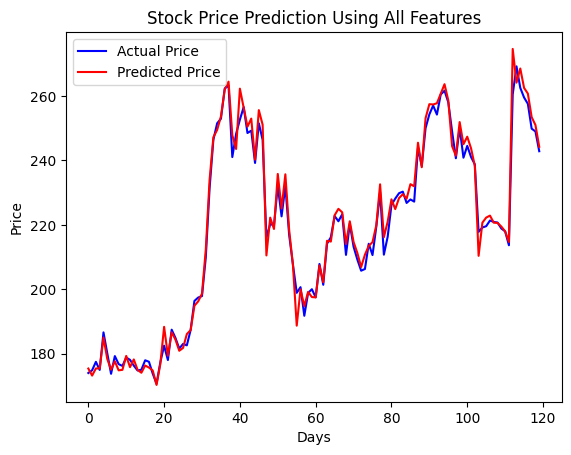

In [15]:
# 進行預測
# print(model.summary())
#print(X_test)
predictions = model.predict(X_test)  # 預測

"""
# 把預測結果轉回原始百分比格式，乘以100
predictions_percentage = predictions * 100
y_test_percentage = y_test * 100
y_train_percentage = y_train * 100
"""
# 輸出預測結果
print("Predictions (as percentage):", predictions.flatten())
print("True Values (as percentage):", y_test)

# 計算各種性能指標
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
"""
# 正負預測正確機率
c = 0
for i in range(len(predictions)):
  if (predictions[i]>=0 and y_test[i]>=0) or (predictions[i]<0 and y_test[i]<0):
    c = c+1
print("正負預測正確機率", c/len(predictions))
"""
"""
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
"""
# MAPE
mape = mean_absolute_percentage_error(y_test, predictions) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)
"""
# 畫圖比較
# 合併訓練集和測試集的實際值
y_actual_combined = list(y_train_percentage) + list(y_test_percentage)
# 測試集的預測值需要對應到測試集的部分
predictions_combined = list(y_train_percentage) + list(predictions_percentage)
# 繪製圖表
plt.figure(figsize=(12, 6))
# 繪製實際值曲線（訓練 + 測試）
plt.plot(y_actual_combined, color='green', label='Actual Price (Training + Testing)')
# 繪製預測值曲線（僅測試集部分）
plt.plot(predictions_combined, color='red', label='Predicted Price (Testing)')
# 標題與標籤
plt.title('Stock Price Prediction Including Training and Testing')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
"""
# 畫圖比較
#plt.plot(y_train, color='green', label='Actual Price')
plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title('Stock Price Prediction Using All Features')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()



初始本金: $10000
最終本金: $215797.66
回報率: 2057.98%


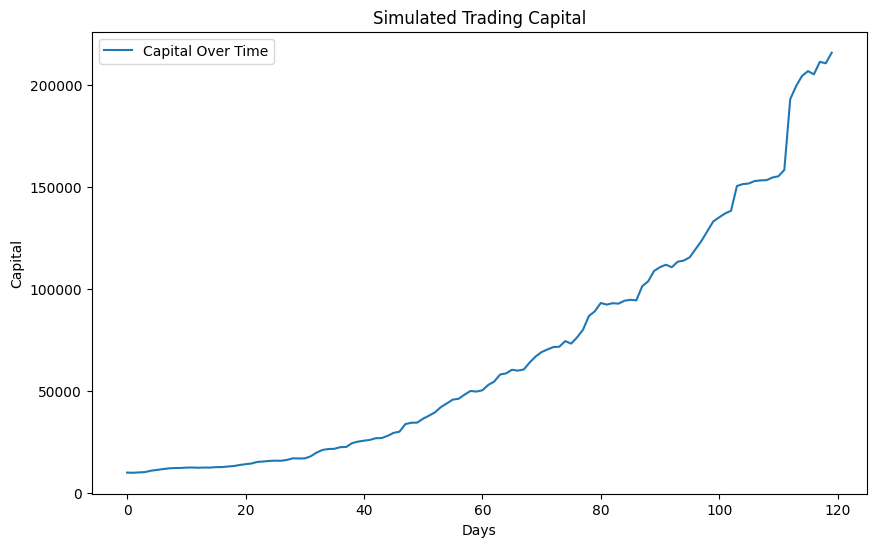

In [13]:
initial_capital = 10000
def simulate_trading_with_tracking(initial_capital, actual_prices, predicted_prices):
    """
    模擬交易並記錄每一天的本金變化。
    """
    capital = initial_capital
    capital_history = [capital]  # 用來存儲每天的本金
    for i in range(1, len(actual_prices)):
        actual_prev = actual_prices[i - 1]
        actual_today = actual_prices[i]
        predicted_today = predicted_prices[i]

        change = (actual_today - actual_prev) / actual_prev
        if predicted_today > actual_prev:
            capital *= (1 + change)
        elif predicted_today < actual_prev:
            capital *= (1 - change)

        capital_history.append(capital)
    return capital_history

# 模擬交易並追踪本金
capital_history = simulate_trading_with_tracking(initial_capital, y_test, predictions)
final_capital = capital_history[-1]

# 計算回報率
roi = (final_capital - initial_capital) / initial_capital * 100

# 打印結果
print(f"初始本金: ${initial_capital}")
print(f"最終本金: ${final_capital:.2f}")
print(f"回報率: {roi:.2f}%")

# 繪製本金變化圖
plt.figure(figsize=(10, 6))
plt.plot(capital_history, label='Capital Over Time')
plt.title('Simulated Trading Capital')
plt.xlabel('Days')
plt.ylabel('Capital')
plt.legend()
plt.show()

[[[0.04500002 0.04385508 0.0506193  0.         0.58754682 0.5       ]]

 [[0.04697914 0.04578986 0.05099095 0.         0.57865169 0.75      ]]

 [[0.04923037 0.0464596  0.05327043 0.         0.56226592 1.        ]]

 [[0.04913142 0.04755101 0.05453406 0.         0.57537453 0.        ]]

 [[0.05066523 0.04819594 0.05579768 0.         0.56413858 0.25      ]]]
[2023.6 2031.2 2031.9 2038.3 2039.7]
[[0.81861452 0.82699568 0.82564711 0.         0.6090824  0.        ]]
5180.74
[[[0.81861452 0.82699568 0.82564711 0.         0.6090824  0.        ]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
future prediction is  [[4999.051]]
[ 4.09311419e+03  4.10419141e+03  4.09289527e+03  0.00000000e+00
 -3.50701287e-02  2.50000000e-01]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
future prediction is  [[7388.8584]]
[3.02475343e+07 3.02222128e+07 3.02461486e+07 0.00000000e+00
 4.78052288e-01 5.00000000e-01]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
future prediction is  [[7388.8584]]
[2.23524995e+11 2.23465932e+11 2.2348659

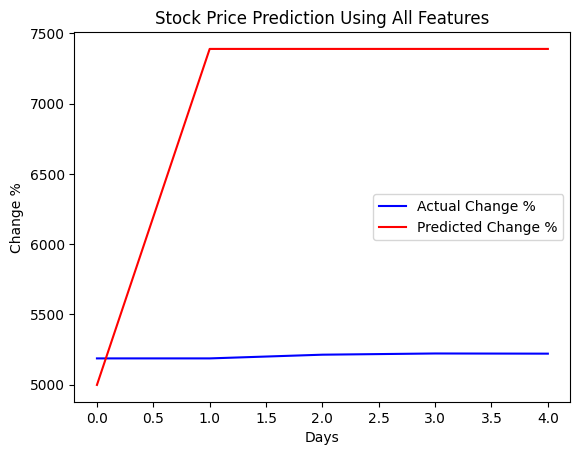

In [62]:
from ctypes import c_char
# 生成未来的pred
# pred未来 5 天
num_future_days = 5
predictions = []
predictions.append(y_train[-1])

# 用最近一天的 data to pred
print(X_train[0:5])
print(y_train[0:5])
print(X_train[-1])
print(y_train[-1])
last_data = X_train[-1].reshape(1, 1, featureNum)  # 把最後一行數據變成 (1, 1, featureNum)
print(last_data)
"""
for _ in range(num_future_days):
    # 進行預測
    future_prediction = model.predict(last_data)
    predictions.append(future_prediction[0, 0])  # 把預測結果添加到列表中

    # 更新输入：将最新的預測結果作為下次的輸入
    # 假設新的數據是根據 X 的最後一行加上預測值
    new_input = np.append(last_data[0, 0, 1:], future_prediction)  # 去掉第一列，添加预测值
    print(last_data[0, 0, 1:])
    last_data = new_input.reshape(1, 1, featureNum)  # 更新输入形状为 (1, 1, featureNum)
    #print(last_data)
"""
for i in range(num_future_days):
    # 進行預測
    future_prediction = model.predict(last_data)
    print("future prediction is ", future_prediction)
    predictions.append(future_prediction[0, 0])  # 把預測結果添加到列表中

    # 生成未來特徵更新規則
    # 把預測結果插入到下一天的特徵中，並且更新其他特徵
    new_open = last_data[0, 0, 0] * (1 + future_prediction[0, 0])  # 模擬下一个開盤價
    new_high = new_open * (1 + np.random.normal(0, 0.001))  # 隨機模擬
    new_low = new_open * (1 - np.random.normal(0, 0.001))  # 隨機模擬
    #new_close = new_open * (1 + future_prediction[0, 0])  # 使用預測結果模擬收盤價
    new_change = (future_prediction[0, 0] - predictions[i]) / predictions[i]  # 模擬變動百分比
    new_vol = last_data[0, 0, 3] * (1 + np.random.normal(0, 0.001))  # 隨機模擬交易量
    new_day = 0
    if last_data[0,0,-1] == 0:
      new_day = 0.25
    elif last_data[0,0,-1] == 0.25:
      new_day = 0.5
    elif last_data[0,0,-1] == 0.5:
      new_day = 0.75
    elif last_data[0,0,-1] == 0.75:
      new_day = 1
    elif last_data[0,0,-1] == 1:
      new_day = 0
    new_data_point = np.array([new_open, new_high, new_low, new_vol, new_change, new_day])
    print(new_data_point)
    last_data = new_data_point.reshape(1, 1, 6)

# 轉為原始百分比格式
predictions_percentage = np.array(predictions) * 1
y_test_percentage = np.array(y_test) * 1

# 輸出未来5天的预测结果
print("Future Predictions (as percentage):", predictions_percentage)
print("True Values (as percentage):", y_test_percentage[:5])
# 評估指標
mse = mean_squared_error(y_test[:5], predictions[1:])
mae = mean_absolute_error(y_test[:5], predictions[1:])
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
# MAPE
mape = mean_absolute_percentage_error(y_test[:5], predictions[1:]) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)
"""
# 正負預測正確機率
cc = 0
for i in range(len(predictions)):
  if (predictions[i]>=0 and y_test[i]>=0) or (predictions[i]<0 and y_test[i]<0):
    cc = cc+1
print("正負預測正確機率", cc/len(predictions))
"""
#print(y_test[-5:])
#y_test = list(reversed(y_test[:5]))
#print(rev_y_test)
# 正負預測正確機率
cc = 0
for i in range(len(predictions)):
  if (predictions[i]>=0 and y_test[i]>=0) or (predictions[i]<0 and y_test[i]<0):
    cc = cc+1
print("正負預測正確機率", cc/len(predictions))
# 畫圖比較
plt.plot(y_test_percentage[:5], color='blue', label='Actual Change %')
plt.plot(predictions_percentage[1:], color='red', label='Predicted Change %')
plt.title('Stock Price Prediction Using All Features')
plt.xlabel('Days')
plt.ylabel('Change %')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 讀取CSV檔案
data = pd.read_csv('/content/drive/MyDrive/colab/ML project/TSLA Historical Data NEW.csv')  # 替換為您的檔案路徑

# 選擇特徵並處理標籤
# 假設欄位名稱為 'Date', 'Close', 'Open', 'High', 'Low', 'Volume', 'Change %'
# data = data[['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']]  # 選擇特徵欄位
data = data[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']]  # 選擇特徵欄位
#print(data.head())

# 將 'Change %' 欄位轉換為數字，去除百分比符號並轉為小數
data['Change %'] = data['Change %'].str.replace('%', '').astype(float) / 100.0
print(data.head())

# 縮放特徵數據
feature_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = feature_scaler.fit_transform(data[['Price', 'Open', 'High', 'Low', 'Vol.']])
print(scaled_features)
print(scaled_features.shape)
print(len(scaled_features))

# 縮放標籤數據
label_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_labels = label_scaler.fit_transform(data[['Change %']])

# 創建序列資料（用20天的數據來預測第31天的變動百分比）
sequence_length = 20  # 使用過去30天的數據
X = []
y = []

for i in range(sequence_length):
    # 將過去30天的特徵數據添加到 X
    for j in range(5):
      print(scaled_features[j:i-sequence_length])
      X.append(scaled_features[i-sequence_length:j])
    # 將對應的變動百分比標籤添加到 y
    y.append(scaled_labels[i, 0])

# 轉換為numpy陣列並檢查形狀
X, y = np.array(X), np.array(y)
print("X.shape:", X.shape)
print("y.shape:", y.shape)
print(X)
print(y)

# 檢查完形狀後再進行重塑（如果 X 的維度不符，則跳過此步驟）
if len(X.shape) == 3:
    X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))  # (樣本數, 時間步長, 特徵數)

# 構建LSTM模型
model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),  # 第一層LSTM，輸出大小256
    Dropout(0.3),
    LSTM(256),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # 最後的輸出層，輸出單一變動百分比值
])

# 編譯模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 訓練模型
model.fit(X, y, epochs=50, batch_size=32)


    Price    Open    High     Low    Vol.  Change %
0  262.51  270.00  273.54  262.24  107.65   -0.0248
1  269.19  256.01  269.49  255.32  161.61    0.0334
2  260.48  244.68  262.12  242.65  204.49    0.2192
3  213.65  217.13  218.72  212.11   80.94   -0.0198
4  217.97  217.31  218.22  215.26   43.27   -0.0040
[[0.87972632 1.         1.         1.         0.39933011]
 [1.         0.73538869 0.92678959 0.86195891 0.73402804]
 [0.84317609 0.52108946 0.79356471 0.60921604 1.        ]
 [0.         0.         0.00903832 0.         0.23365587]
 [0.07778178 0.00340458 0.         0.06283662 0.        ]
 [0.09362622 0.03347834 0.04085322 0.07221225 0.02518298]
 [0.12693554 0.06771326 0.07339118 0.14203072 0.03932515]
 [0.1303565  0.08435786 0.06977585 0.1154997  0.04664434]
 [0.13827872 0.08076414 0.08315257 0.13604628 0.0394492 ]
 [0.10658985 0.05447324 0.10918294 0.09994016 0.12231733]
 [0.09920778 0.05674295 0.06670282 0.03251546 0.26684034]
 [0.07472092 0.05674295 0.09255242 0.04528227 0.61

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (100,) + inhomogeneous part.